# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 2

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **26 февраля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

## Задача 1.

Рассмотрим данные исследования 2004 года о зависимости риска развития диабета от пола, возраста, индекса массы тела, среднего кровяного давления и других показателей. 

Функция `sklearn.datasets.load_diabetes()` возвращает словарь. В поле `data` записана матрица регрессоров, в которой данные предварительно центрированы и нормированы. В поле `target` записана мера прогрессирования заболевания в течении года. В поле `DESCR` можно прочитать подробнее о данных.

### Загрузка данных

In [2]:
data = load_diabetes()

Посмотрим на описание датасета.

In [3]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Поле `data` содержит матрицу размера 442 $\times$ 10, где 442 — количество пациентов, а 10 — количество признаков (возраст, пол, и т.д.). 
Строки матрицы соответствуют пациентам, столбцы — признакам.

In [4]:
data['data'].shape

(442, 10)

Целевая переменная $-$ мера прогрессирования заболевания в течении года.


In [5]:
data['target'].shape

(442,)

Создайте матрицу регрессоров $X$ и столбец наблюдений $y$.

In [6]:
X, y = data['data'], data['target']
columns = data['feature_names']

### Обучение моделей

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20.

Если что-то забыли или что-то не понятно, можно почитать справку:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


Заведите модель линейной регрессии из `sklearn` и обучите ее по обучающей части данных.

In [8]:
model = LinearRegression(fit_intercept=True)

model = model.fit(X_train, y_train)

Выведите кооэффициенты модели, включая свободный член.

In [9]:
print(f"Коэффиценты:  \n {model.coef_ :}" +  "\n \n\n" + f"Свободный член: \n {model.intercept_ :.4}")

Коэффиценты:  
 [ -69.23751405 -274.07458785  530.60618551  324.69083182 -795.08128691
  473.54089085   27.77281629  153.34640981  757.38521439   50.07369927]
 

Свободный член: 
 150.5


Посчитайте предсказания построенной модели на тестовой выборке

In [10]:
y_pred = model.predict(X_test)

Реализуйте метрики MSE, MAE, MAPE без использования `sklearn` и других готовых реализаций.

In [11]:
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred)**2).sum() / len(y_true)

def mean_absolute_error(y_true, y_pred):
    return (np.absolute(y_true - y_pred).sum()) / len(y_true)

def mean_absolute_percentage_error(y_true, y_pred):
    return (np.absolute(1 - y_true / y_pred).sum()) * 100 / len(y_true)

Посчитайте MSE, MAE, MAPE на тестовой выборке и выведите с точностью до трех знаков после запятой.

In [12]:
print(f"MSE:  {mean_squared_error(y_test, y_pred) :.4}" + 
     "\n" + f"MAE:  {mean_absolute_error(y_test, y_pred) :.4}" +
      '\n' + f"MAPE:  {mean_absolute_percentage_error(y_test, y_pred) :.5}"
     )

MSE:  3.965e+03
MAE:  52.15
MAPE:  36.099


Постройте графики зависимости предсказания прогрессирования заболевания от различных признаков по отдельности. При работе с конкретным признаком полагайте значения остальных признаков равными средним значениям этих признаков на тестовой выборке.

Все графики нарисуйте в одном окне.


*Может помочь следующий код:*

`
copies = np.tile(a, k).reshape((k, -len(a))) 
` *создает $k$ копий массива `a` размера (`len(a)`, ).* 
*Размер полученной матрицы $k \times len(a)$.*

*Также рекомендуется изучить ноутбуки с занятий.*





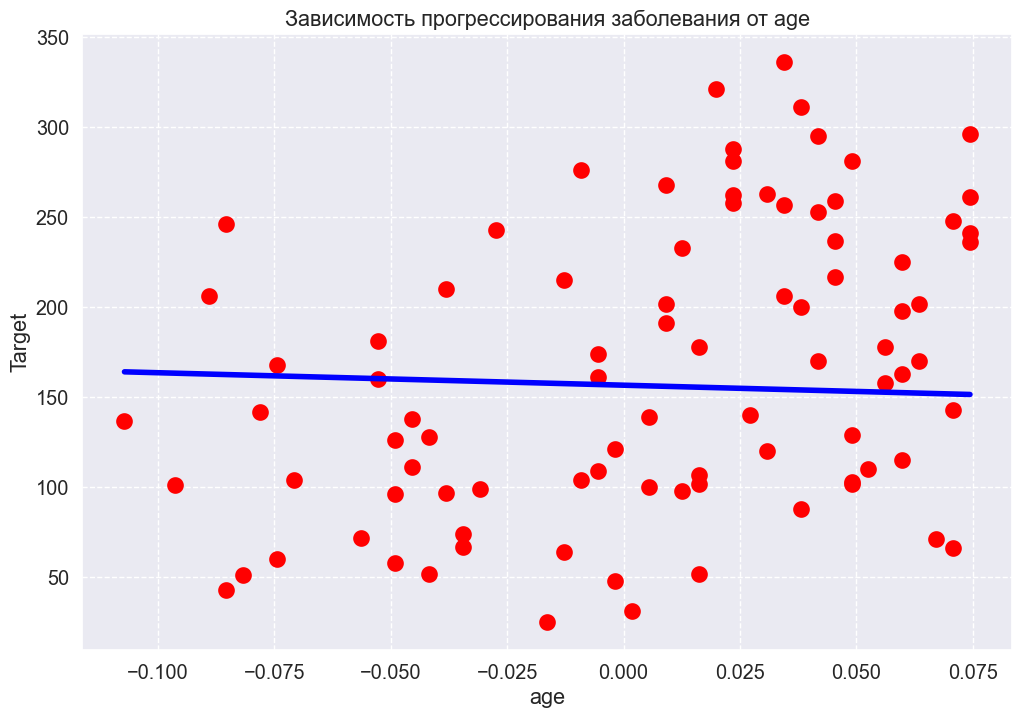

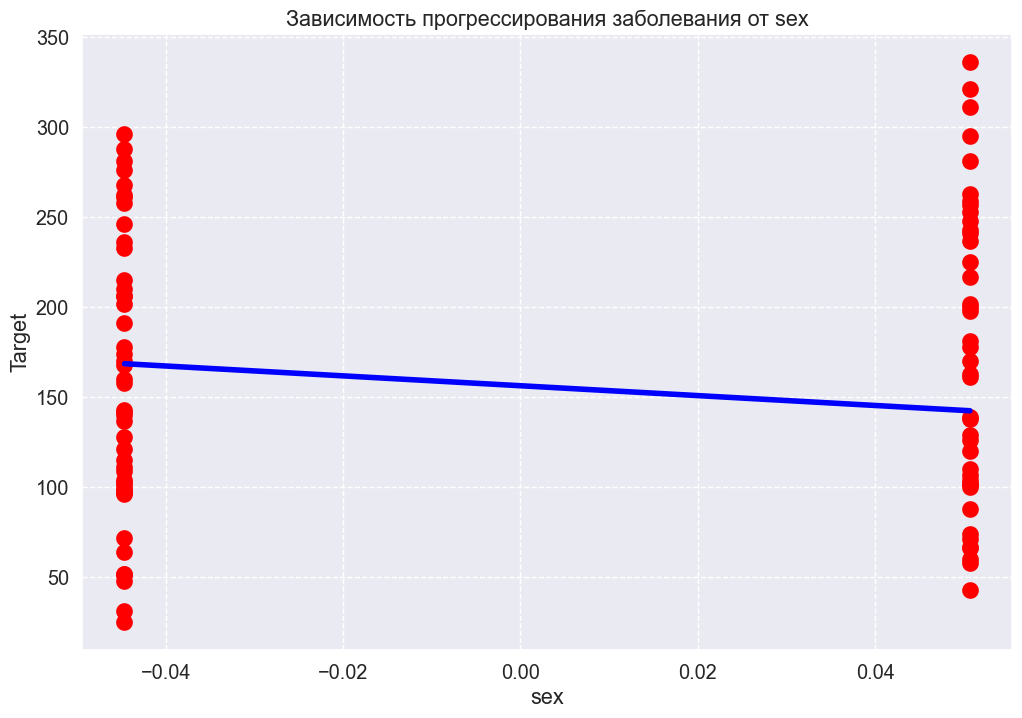

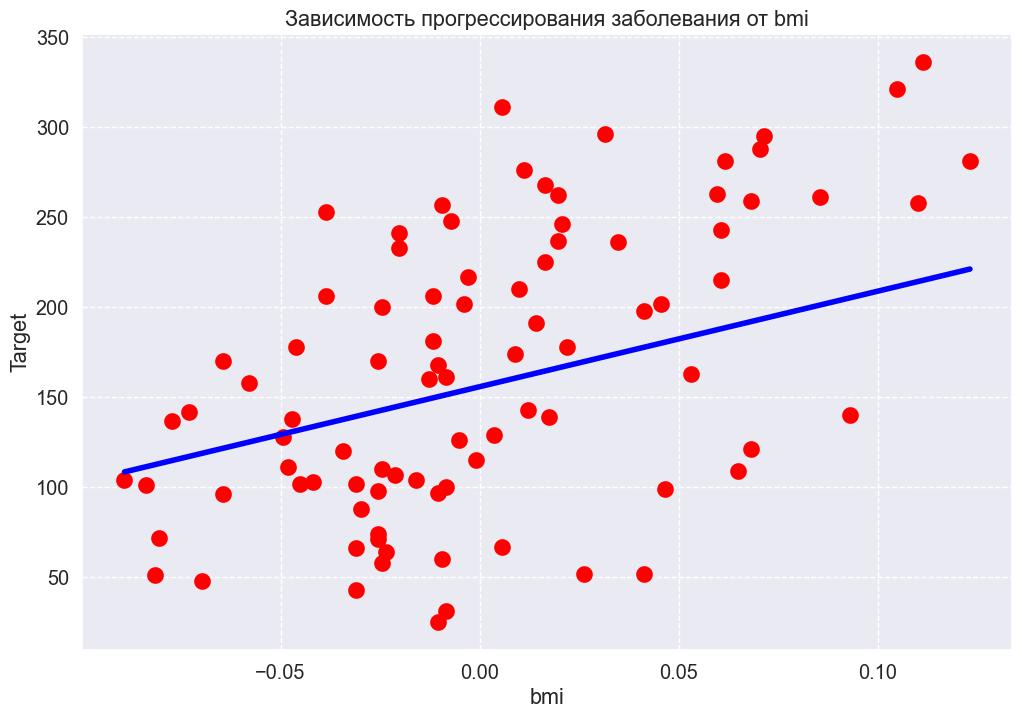

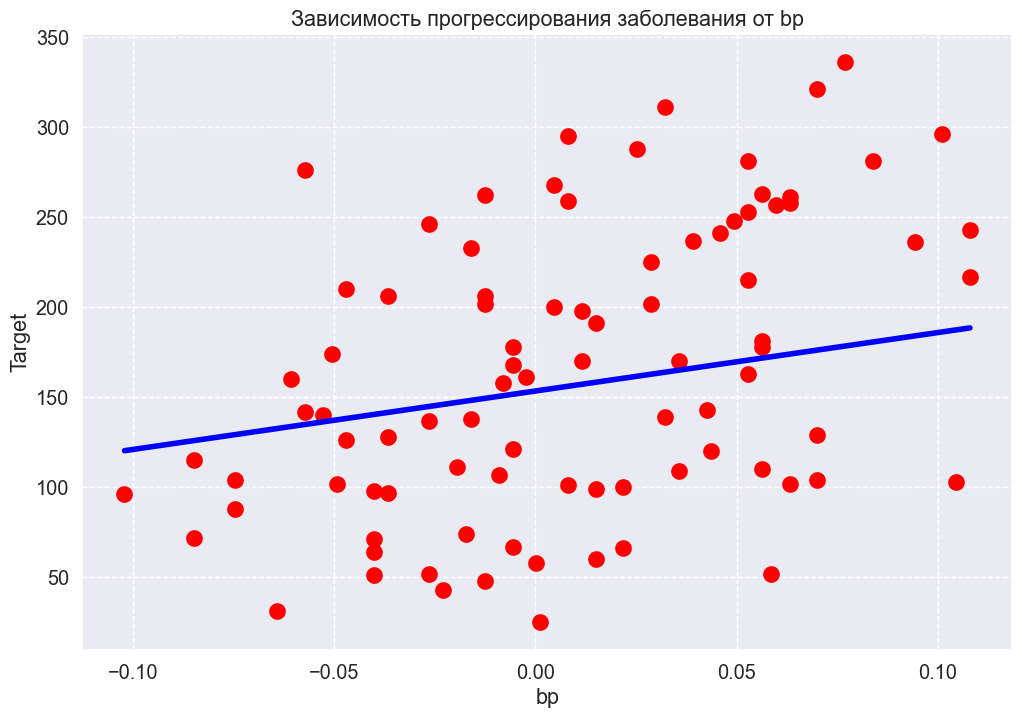

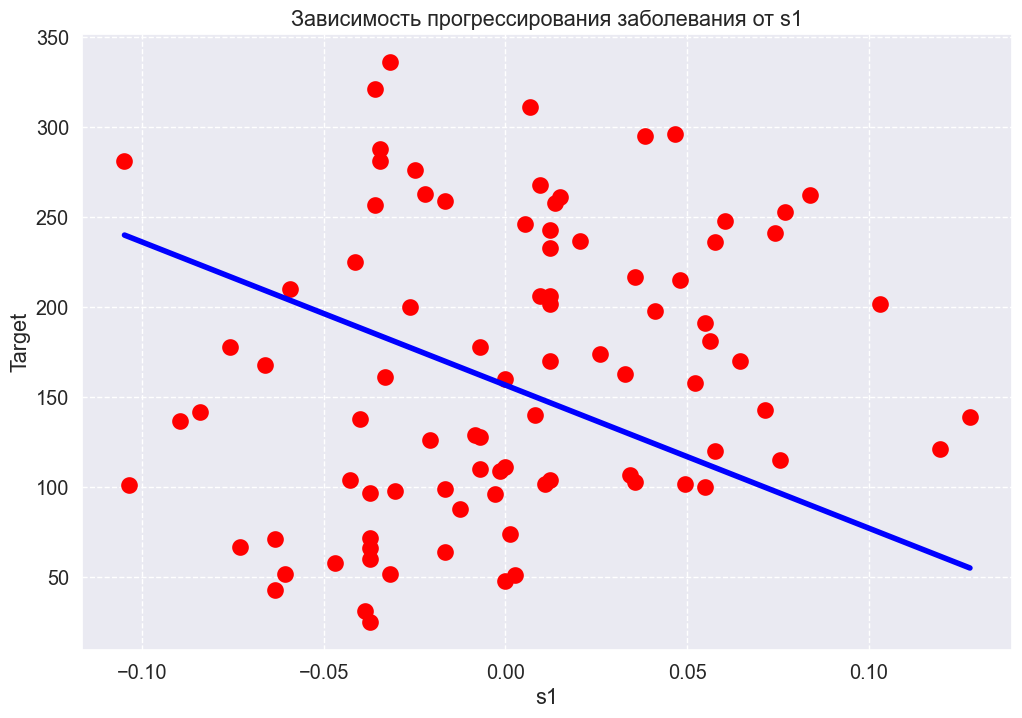

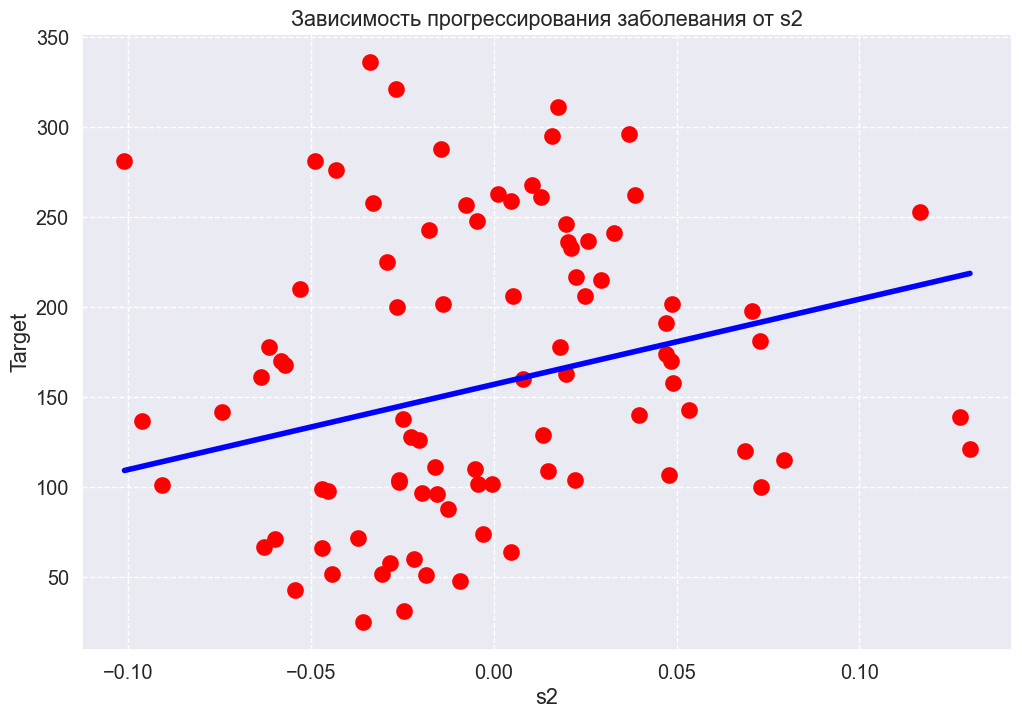

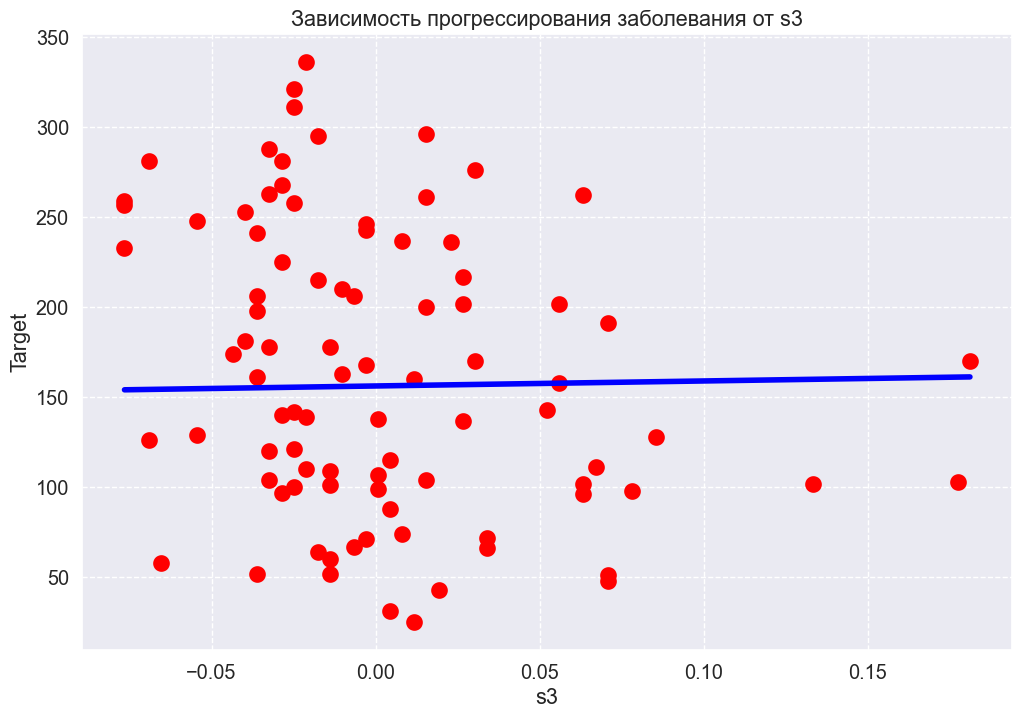

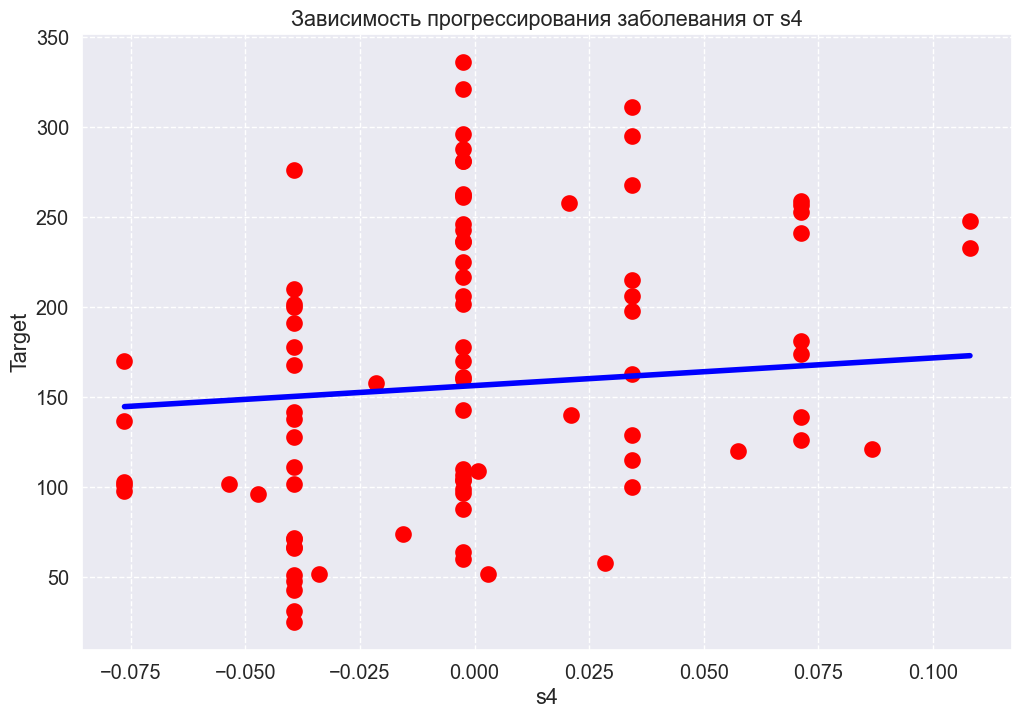

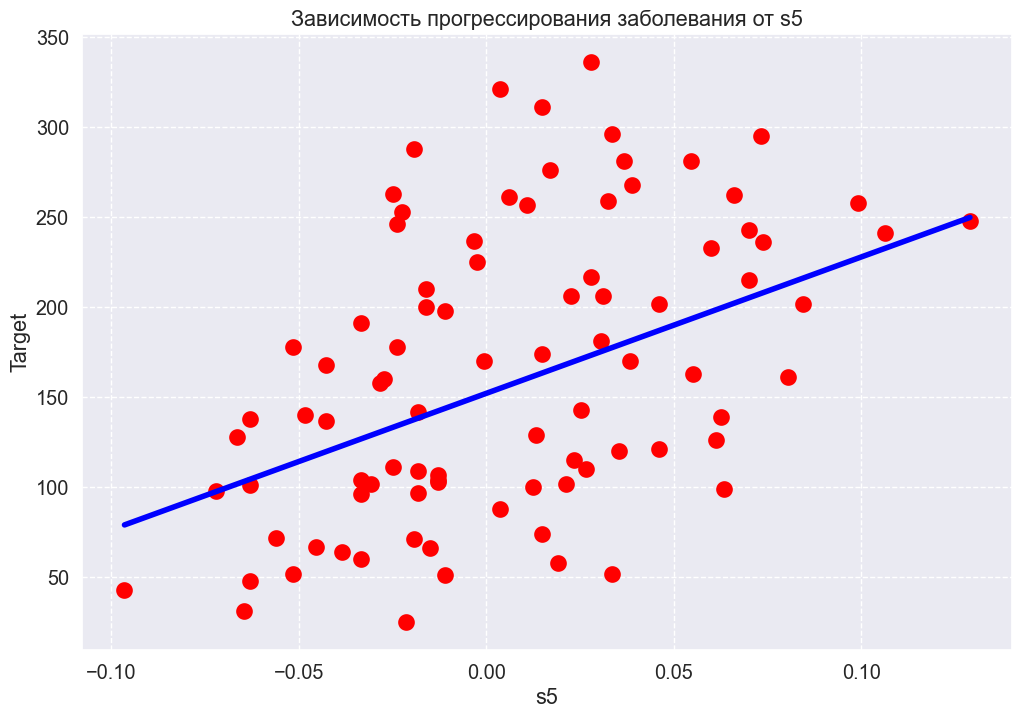

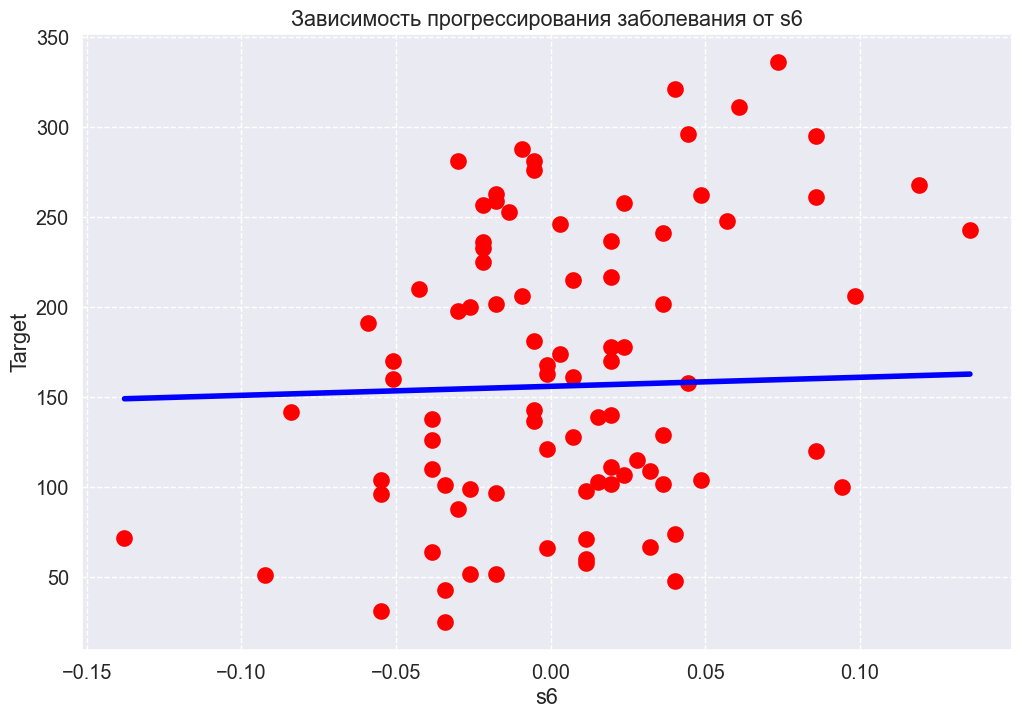

In [13]:
for i in range(10):
    plt.figure(figsize=(12, 8))
    grid =  np.linspace(X_test[:, i].min(), X_test[:, i].max(), 1000)
    X_tmp = np.empty((len(grid), 10))
    X_tmp[:, i] = grid
    for j in range(10):
        if (j != i):
            X_tmp[:, j].fill(X_test[:, j].mean())
    
    y_pred_grid = model.predict(X_tmp)
    plt.plot(grid, y_pred_grid, color='blue', linewidth=4, label="Предсказаниe")
    plt.scatter(X_test[:, i], y_test, color='red', linewidths=6, label="Измерения")
    plt.xlabel(str(columns[i]))
    plt.ylabel("Target")
    plt.title("Зависимость прогрессирования заболевания от " + columns[i])
    plt.grid(linestyle='--')

    plt.show()

### Своя реализация модели

Теперь реализуем линейную регрессию самостоятельно, используя формулы с лекции.
Вам нужно только заполнить прочерки в методах `fit` и `predict`.

In [14]:
class MyLinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """
    
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    def fit(self, X, Y):
        """
        Функция обучения модели. 
        
        Предполагается модель Y = X * theta + epsilon. 
        где X --- регрессор (матрица размера n x d), 
        Y --- отклик (матрица размера n x 1),
        epsilon-ы имеют нормальное распределение

        Обратите внимание, здесь нет intercept_
        """
        
        if (self.fit_intercept):
            #добавить столбец единиц в X отвечающих свободному члену
            tmp_X = np.append(X, np.zeros((X.shape[0],1)), axis=1)
            tmp_X[:, -1].fill(1)
        else:
            tmp_X = X
            
        self.n, self.d = tmp_X.shape
        self.theta = np.linalg.inv(tmp_X.T.dot(tmp_X)).dot(tmp_X.T).dot(Y)
          
        return self
    
        
    def predict(self, X):
        """
        Возвращает предсказание отклика на новых объектах X 
        и опционально доверительный/предсказательный интервал.
        
        X --- матрица объектов размера n x d
                        
        """
        
        if (self.fit_intercept):
            #добавить столбец единиц в X\
            tmp_X = np.append(X, np.zeros((X.shape[0],1)), axis=1)
            tmp_X[:, -1].fill(1)
        else:
            tmp_X = X
        
        y_pred = tmp_X.dot(self.theta)
        return y_pred
    
    def coef_(self):
        return self.theta[:-1]
    
    
    def intercept_(self):
        return(self.theta[-1])

Обучите вашу модель на данных о диабете с добавлением свободного члена.
Распечатайте коэффициенты и сравните их с коэффициентами модели из `sklearn`.

In [15]:
my = MyLinearRegression(True)

my = my.fit(X_train, y_train)

Теперь обучите модель без свободного члена.

In [16]:
my_without_intercept = MyLinearRegression(False)

my_without_intercept = my_without_intercept.fit(X_train, y_train)

Сравните качество моделей со свободным членом и без него на тестовой выборке.

In [17]:
y_pred_my = my.predict(X_test)

print("Модель с свободным членом")
print(f"MSE:  {mean_squared_error(y_test, y_pred_my) :.4}" + 
     "\n" + f"MAE:  {mean_absolute_error(y_test, y_pred_my) :.4}" +
      '\n' + f"MAPE:  {mean_absolute_percentage_error(y_test, y_pred_my) :.5}"
     )

y_pred_my_wi = my_without_intercept.predict(X_test)

print("\n Модель без свободного члена")
print(f"MSE:  {mean_squared_error(y_test, y_pred_my_wi) :.4}" + 
     "\n" + f"MAE:  {mean_absolute_error(y_test, y_pred_my_wi) :.4}" +
      '\n' + f"MAPE:  {mean_absolute_percentage_error(y_test, y_pred_my_wi) :.5}"
     )


Модель с свободным членом
MSE:  3.965e+03
MAE:  52.15
MAPE:  36.099

 Модель без свободного члена
MSE:  3.016e+04
MAE:  161.6
MAPE:  1710.4


Сделайте выводы.

Данные плохо описываются моделью без свободного члена. И как видно из одинаковости результатов для линейного регрессора из библиотеки sklearn и класса MyLinearRegression, первый использует внутри себя метод МНК в случае невырожденной матрицы X.

## Задача 2.

### Часть 1

Скачайте [датасет](https://www.kaggle.com/deepu1109/star-dataset) и распакуйте. Вы получите файл `6 class csv.csv`. 
Он представляет собой таблицу некоторых характеристик звезд, таких как температура, радиус и т.д..
В описании к датасету указаны следующие типы звезд:
* Brown Dwarf (0),
* Red Dwarf (1),
* White Dwarf (2),
* Main Sequence (3),
* Supergiant (4),
* Hypergiant (5).

На основании характеристик мы хотим классифицировать звезды по типу. 


In [18]:
data = pd.read_csv("6 class csv.csv")
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [19]:
data.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

Для классификации с помощью kNN будем использовать только столбцы с числовыми значениями. 
Целевая переменная (класс) находится в столбце Star type.

Разделите данные на признаки $X$ и целевую переменную $y$.

In [20]:
needed_columns = [
    'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'
]
       
X = data[needed_columns]
y = data["Star type"]

Разделите данные на тренировочную и тестовую выборки, `test_size` возьмите равным 0.3.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 4), (72, 4), (168,), (72,))

Заведите модель классификатора kNN из `sklearn`, параметр `n_neighbours` возьмите по умолчанию. Обучите модель на тренировочной выборке

In [22]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

Реализуйте метрику accuracy без использования `sklearn` и других ее готовых реализаций.

In [23]:
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum()/len(y_true)

Посчитайте метрику качества по тренировочной и тестовой выборкам и выведите эти значения с точностью 4 знака после запятой.

In [24]:
print(f"accuracy_score for test:  {accuracy_score(y_test, model.predict(X_test)) :.4}")
print(f"accuracy_score for train:  {accuracy_score(y_train, model.predict(X_train)) :.4}")

accuracy_score for test:  0.5694
accuracy_score for train:  0.744


#### Нормализация данных

Разные столбцы могут иметь разную величину значений. Из-за этого близость по одной координате может "значить" больше, чем близость по другой. Иногда разная значимость признаков может быть оправдана, но в данном случае попробуем нормализовать данные. Для этого воспользуемся  [`sklearn.preprocessing.StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [25]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_, scaler.scale_

(array([1.12336548e+04, 1.11852854e+05, 2.37221042e+02, 4.48423810e+00]),
 array([1.00966770e+04, 1.85344148e+05, 5.14733653e+02, 1.05247897e+01]))

Преобразуйте даннные с помощью Scaler-a.

In [26]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Обучите новый классификатор kNN на преобразованных данных.

In [27]:
model_scaled = KNeighborsClassifier()
model_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Посчитайте метрику accuracy на тренировочной и тестовой выборке для новой модели.

In [28]:
print(f"accuracy_score for scaled test data:  {accuracy_score(y_test, model_scaled.predict(X_test_scaled)) :.4}")
print(f"accuracy_score for scaled train data:  {accuracy_score(y_train, model_scaled.predict(X_train_scaled)) :.4}")

accuracy_score for scaled test data:  0.9722
accuracy_score for scaled train data:  0.9881


Сделайте выводы.

**Вывод:** При нормализации данных качество модел сильно увеличилось, все признаки стали более равнозначными, это значит, что в реальности все выбранные нами признаки одинаковы(в плане веса) для определения того или иного типа звезды. 

#### Обучение моделей

Теперь посмотрим, как зависит метрика качества моделей от $k$ — количества соседей.
Обучите модели для каждого $k$ из массива `ks`. Посчитайте метрику качества этих моделей на тренировочной и тестовой выборках. То же проделайте и для нормализованных данных.

In [29]:
ks = np.arange(1, 51, 2)  # различные значения k

# Создание и обучение моделей:
models = [KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train) for k in ks]  # массив моделей, элемент - одна модель
# можете писать свой дополнительный код

# Подсчет метрики качества

scores = [accuracy_score(y_test, elem.predict(X_test)) for elem in models]  # массив значений метрик качества моделей 
                                             # из массива models на тестовой выборке, elem - одна модель
# можете писать свой дополнительный код

scores_train = [accuracy_score(y_train, elem.predict(X_train)) for elem in models]  # массив значений метрик качества на тренировочной выборке
# можете писать свой дополнительный код

models_scaled = [KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train) for k in ks]

scores_scaled = [accuracy_score(y_test, elem.predict(X_test_scaled)) for elem in models_scaled]

scores_scaled_train = [accuracy_score(y_train, elem.predict(X_train_scaled)) for elem in models_scaled]

Теперь постройте на одном графике четыре зависимости значений метрики качества от параметра $k$. Не забудьте подписать, чему какая линия соответствует, т.е. указать тренировочная или тестовая выборка, есть или нет нормализации, а также подпишите название и оси графика.

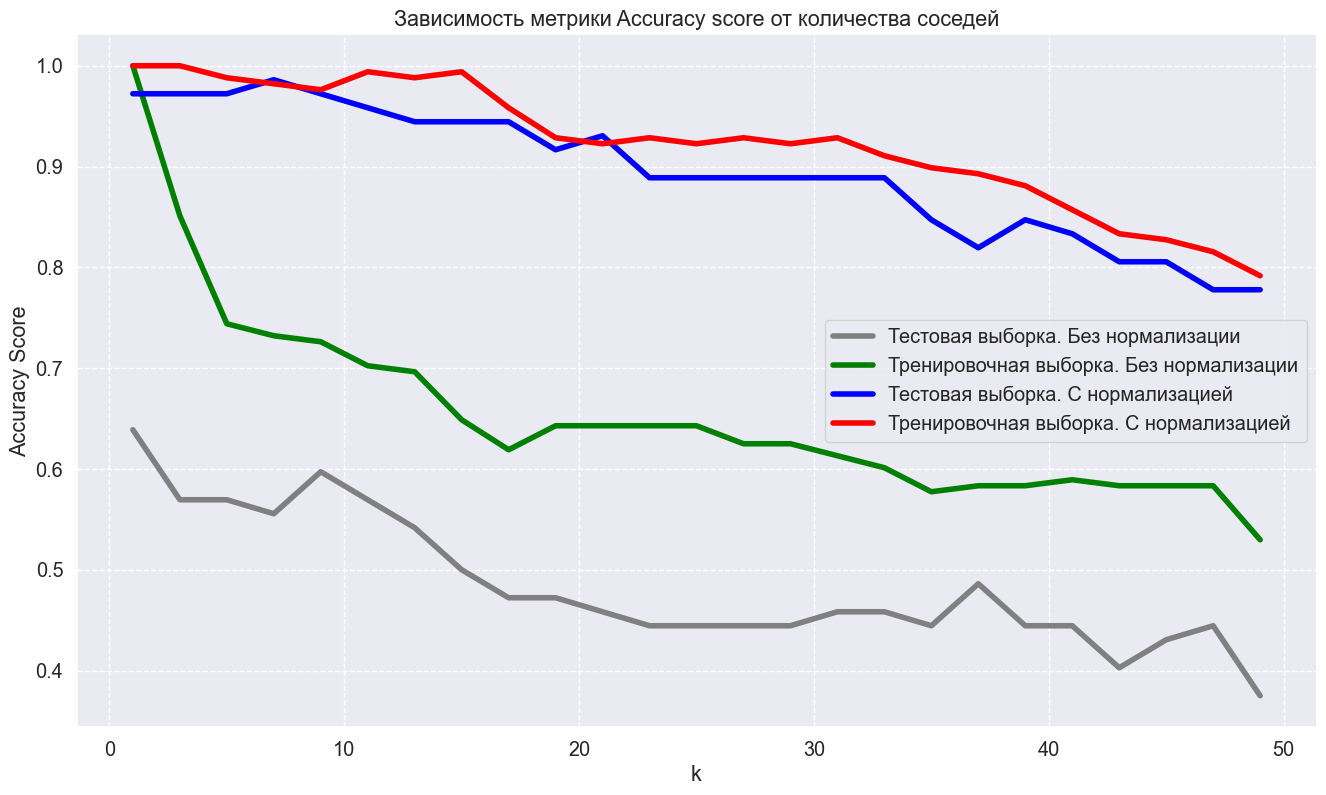

In [30]:
plt.figure(figsize=(16, 9))
plt.plot(ks, scores, color='gray', linewidth=4, label="Тестовая выборка. Без нормализации")
plt.plot(ks, scores_train, color='green', linewidth=4, label="Тренировочная выборка. Без нормализации")
plt.plot(ks, scores_scaled, color='blue', linewidth=4, label="Тестовая выборка. С нормализацией")
plt.plot(ks, scores_scaled_train, color='red', linewidth=4, label="Тренировочная выборка. С нормализацией")

plt.xlabel("k")
plt.ylabel("Accuracy Score")
plt.title("Зависимость метрики Accuracy score от количества соседей")
plt.legend()
plt.grid(linestyle='--')

plt.show()

Сделайте выводы.

**Вывод** Все признаки для определения типа звёзд являются равнозначными и оптимальное количество соседей не больше 10.

### Часть 2 

Теперь скачаем [датасет](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate) о предсказании пульсаров.





Пульсары &mdash; это космические объекты, излучающие в различных диапазонах длины волны. Согласно современным астрофизическим теориям, пульсары представляют собой вращающиеся нейтронные звезды, обладающие магнитным полем, наклоненным относительно оси вращения.

Пульсары представляют значительный научный интерес. Поэтому есть потребность в автоматическом обнаружении интересных объектов для ускорения процесса изучения. На практике почти все обнаружения вызваны радиочастотными помехами и шумом, что затрудняет поиск достоверных сигналов. В последнее время для автоматического обнаружения пульсаров начали применять машинное обучение. Актуальная задача сегодня &mdash; бинарная классификация объектов-кандидатов на предмет того, являются ли они пульсарами.

В используемом датасете есть как примеры ложных обнаружений, так и примеры реальных пульсаров, подтвержденные учеными. Данные получены в результате [The High Time Resolution Universe Pulsar Survey I](https://arxiv.org/abs/1006.5744).

Мы будем работать только с файлом `pulsar_data_train.csv`.

In [4]:
data = pd.read_csv("pulsar_data_train.csv")

Сигнал от пульсаров представляет собой периодические импульсы.

Для описания объекта используется integrated profile (интегральный профиль) &mdash; агрегирование сигнала за разные периоды вращения (<a target="_blank" href="http://ipta.phys.wvu.edu/files/student-week-2017/IPTA2017_KuoLiu_pulsartiming.pdf">ссылка</a>, слайд 11). У всех пульсаров разные интегральные профили, и обычно эта характеристика мало меняется во времени.
В данном датасете интегральный профиль также усреднен по частоте.

Кроме того, импульс приходит в разное время на разных частотах. Задержка от частоты к частоте вызвана наличием ионизированной межзвездной среды и называется дисперсией. Не путать с дисперсией в теории вероятностей.

С дисперсией связана еще одна характеристика объекта &mdash; DM-SNR кривая. Подробнее об этой характеристике можно почитать <a target="_blank" href="https://arxiv.org/pdf/1005.5068.pdf#:~:text=period-DM%20diagram%3B%20good%20agreement,pulsars%20in%20their%20candidate%20plots.)">в специализированных материалах</a>.

Обе характеристики, integrated profile и DM-SNR кривая, представляют собой одномерные функции.
При создании датасета значения функций были посчитаны в конечном количестве $n$ точек.
Фактически, были получены реализации выборки двух случайных величин.

Пусть $P = (p_1, \ldots p_n)$ &mdash; массив значений integrated profile.
Для него можно посчитать следующие статистики:

1.   Выборочное среднее $\bar p = \frac{1}{n}\sum \limits_{i=1}^n p_i$;
2.   Выборочное стандартное отклонение $\sqrt{\frac{1}{n}\sum \limits_{i=1}^n (p_i - \bar p)^2}$;
3. Выборочный коэффициент асимметрии (skewness);
4. Выборочный коэффициент эксцесса (kurtosis).

Для $D = (d_1, \ldots d_n)$, массива значений DM-SNR, аналогично.

Именно эти значения по массивам $P$ и $D$ являются признаками в данном датасете.

Про коэффициенты эксцесса и асимметрии можно посмотреть <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0">здесь</a> и <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8">здесь</a>, формулы для выборочных коэффициентов асимметрии и эксцесса можно найти в английской версии этих статей.

<a target="_blank" href="https://arxiv.org/pdf/1603.05166.pdf">Статья</a> с подробным описанием процесса генерации данных.










In [5]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


В этом датасете в некоторых столбцах есть пропуски в данных. Об этом говорит то, что значение Non-Null Count в таблице выше не равно количеству строк для некоторых столбцов. Чтобы не усложнять себе жизнь, пока просто не будем брать эти столбцы для анализа.

Столбец `target_class` отвечает за целевую переменную — индикатор того, является ли объект пульсаром.

In [7]:
needed_columns = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve']  # используем только эти столбцы

X = np.array(data[needed_columns])

In [8]:
y = np.array(data['target_class'])

Разделите данные на train и test, установив `test_size=0.15`.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10648, 5), (1880, 5), (10648,), (1880,))

Обучите стандартный классификатор kNN на тренировочных данные. Выведите значения метрик качества на тренировочной и тестовой выборках.

In [12]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(f"accuracy_score for test:  {accuracy_score(y_test, model.predict(X_test)) :.4}")


print(f"accuracy_score for train:  {accuracy_score(y_train, model.predict(X_train)) :.4}")

accuracy_score for test:  0.9755
accuracy_score for train:  0.9775


Теперь посчитайте долю правильных ответов по каждому классу. Напишите вычисления этих долей самостоятельно. 

Сравните результаты. Одинаково ли хорошо предсказан каждый класс? Сделайте выводы.

In [13]:
def corr_pred(y_true, y_pred, target_class):
    corr_test = 0
    for i in range(y_true.shape[0]):
        if ((y_pred[i] == y_true[i]) and (y_true[i] == target_class)):
            corr_test += 1
    return corr_test


y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(f"Доля правильный срабатываний, что объект пульсар на тестовой выборке: {corr_pred(y_test, y_pred_test, 1)/y_test.sum() :.4} \n")

print(f"Доля правильный срабатываний, что объект не пульсар на тестовой выборке: {corr_pred(y_test,y_pred_test, 0)/(1-y_test).sum() :.4}\n")
    
print(f"Доля правильный срабатываний, что объект пульсар на тренировочной выборке: {corr_pred(y_train, y_pred_train, 1)/y_train.sum() :.4} \n")

print(f"Доля правильный срабатываний, что объект не пульсар на тренировочной выборке: {corr_pred(y_train, y_pred_train, 0)/(1-y_train).sum() :.4}\n")


Доля правильный срабатываний, что объект пульсар на тестовой выборке: 0.8107 

Доля правильный срабатываний, что объект не пульсар на тестовой выборке: 0.9918

Доля правильный срабатываний, что объект пульсар на тренировочной выборке: 0.8008 

Доля правильный срабатываний, что объект не пульсар на тренировочной выборке: 0.9954



Как видно из значений модель не очень хорошо описывает является ли объект пульсаром. Также можно сделать вывод, что при достаточно большом количестве данных эта простая метрика качества перестаёт нормально работать

Подберите оптимальное число соседей с использованием метрики accuracy. Сделайте выводы.

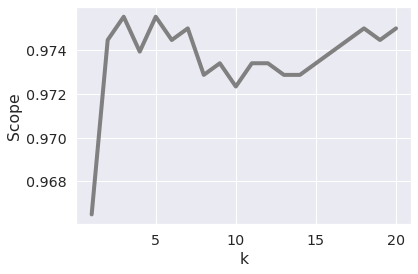

In [14]:
ks = np.arange(1, 21, 1)  # различные значения k

# Создание и обучение моделей:
models = [KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train) for k in ks]  # массив моделей, элемент - одна модель

scores = [accuracy_score(y_test, elem.predict(X_test)) for elem in models]  # массив значений метрик качества моделей 

plt.plot(ks, scores, color='gray', linewidth=4)
plt.xlabel("k")
plt.ylabel("Scope")
plt.show()

Оптимальное число соседей -- 7. Но как было показано в плошлой ячейке, в следствии простоты выбранной метрики качества, это не даёт гарантии, что отдельный класс предсказывается хорошо.

Дополнительно можно почитать о классификации пульсаров, например, в <a target="_blank" href="https://medium.com/duke-ai-society-blog/classifying-pulsar-stars-using-ai-techniques-d2be70c0f691">этой статье</a>.